In [1]:
# Objective: To explore the relationship between various medical and demographic factors among patients
#          : To predict lifestyle factors lead to patients developing diabetes
# As Dataset is highly imbalanced, AUC and F1 score is used to decide on the accuracy of the final prediction model

In [1]:
# to import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/diabetes_prediction_dataset.csv")

In [7]:
# to display variables in dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
# to check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
# Dataset contains 100,000 patients' data
len(df)

100000

In [13]:
# to see distribution of target variable = 'diabetes'
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of diabetic population');

In [15]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [17]:
# 8.5% of patients have diabetes, dataset is imbalanced
pd.DataFrame(100*(df['diabetes'].value_counts())/len(df))

,count
diabetes,
0,91.5
1,8.5


In [19]:
# to check data types of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


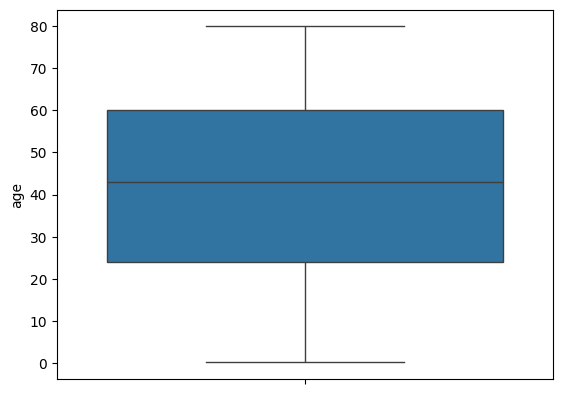

In [225]:
# the average of patients = 40 years
sns.boxplot(data=df, y='age')
plt.show()

In [23]:
# the average age of patient is 41 years
df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [25]:
# to split the years into different categories, using def custom function
def age_categories(s):
    if  0 <= s <= 20:
        return "1 to 20 "
    elif 21 <= s <= 39:
        return "21 to 35"
    elif 36 <= s <= 50:
        return "36 to 50"
    elif 51 <= s <= 65:
        return "51 to 65"
    elif 66 <= s:
        return "above 66"

In [27]:
# to .apply() custom function
df['age_categories'] = df['age'].apply(age_categories)

In [29]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_categories
0,Female,80.0,0,1,never,25.19,6.6,140,0,above 66
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,51 to 65
2,Male,28.0,0,0,never,27.32,5.7,158,0,21 to 35
3,Female,36.0,0,0,current,23.45,5.0,155,0,21 to 35
4,Male,76.0,1,1,current,20.14,4.8,155,0,above 66


In [31]:
df['age_categories'].unique()

array(['above 66', '51 to 65', '21 to 35', '1 to 20 ', '36 to 50'],
      dtype=object)

In [33]:
age_categories_order = ['1 to 20',
                       '21 to 35',
                       '36 to 50',
                       '51 to 65',
                      'above 66']

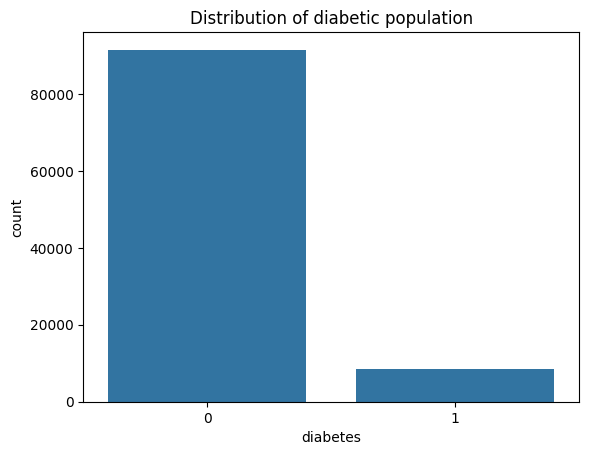

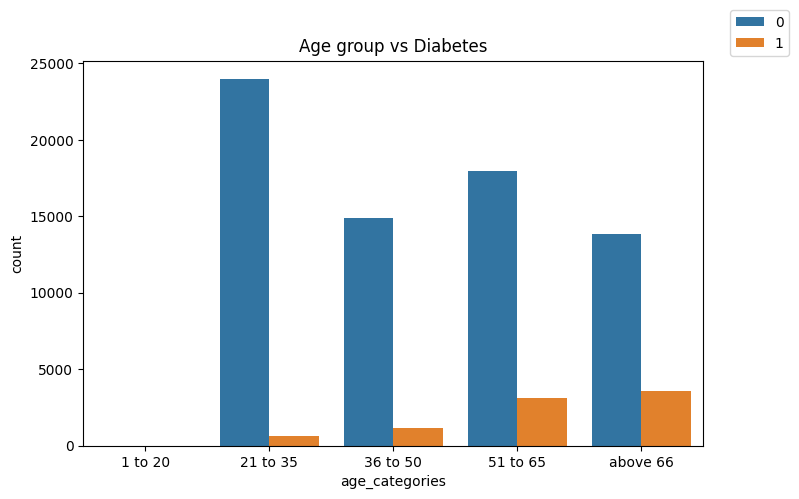

In [35]:
# the incidence of patients' developing diabetes increases with age
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=df, x='age_categories', order=age_categories_order, hue='diabetes')
plt.legend(bbox_to_anchor=(1.15, 1.15))
plt.title('Age group vs Diabetes')
plt.show()

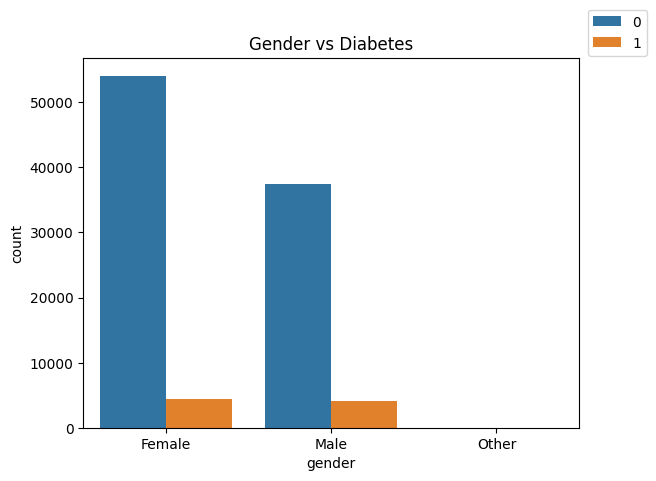

In [37]:
# Females are more likely to get diabetes compared to males
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Gender vs Diabetes')
plt.legend(bbox_to_anchor=(1.15,1.15))
plt.show()

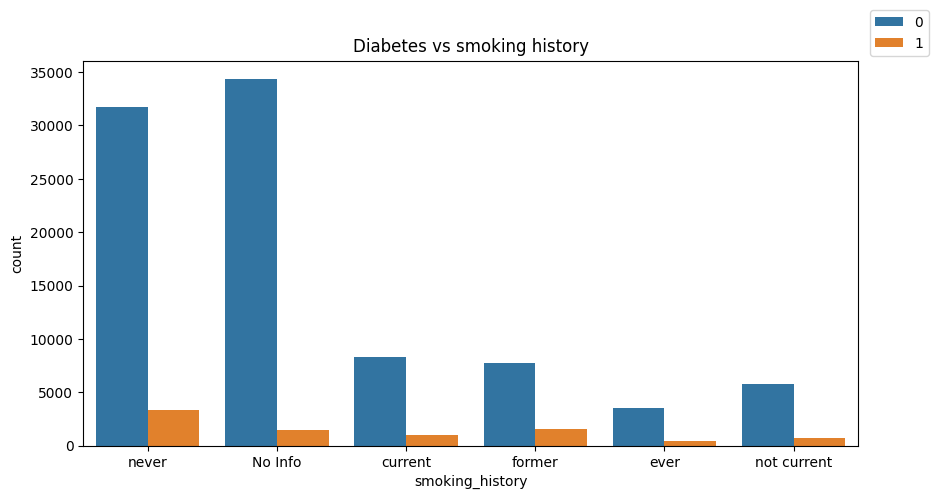

In [39]:
# there is not much correlation between being smoker and being diabetic
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x ='smoking_history', hue='diabetes')
plt.legend(bbox_to_anchor=(1.1,1.15))
plt.title('Diabetes vs smoking history')
plt.show()

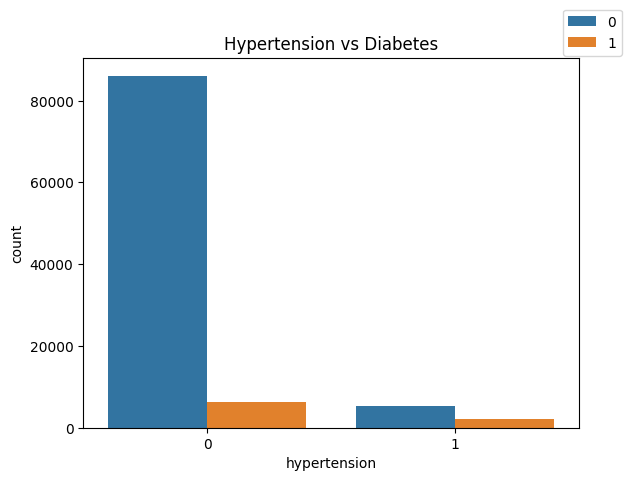

In [43]:
# Diabetic patients are likely non-hypertensive
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title('Hypertension vs Diabetes')
plt.legend(bbox_to_anchor=(1.1, 1.15))
plt.show()

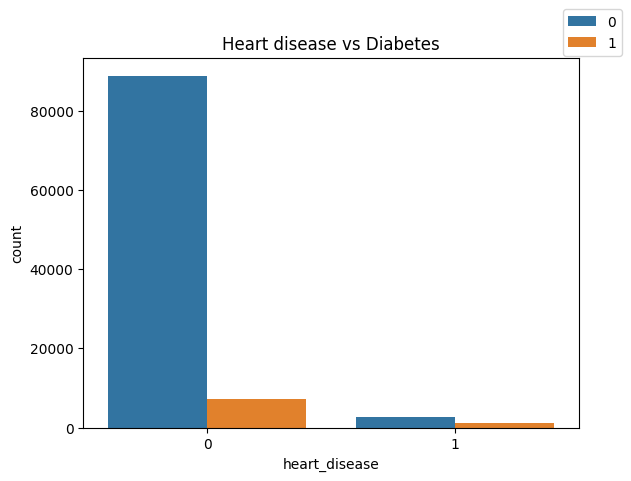

In [45]:
# Diabetic patients are not likely to suffer from heart disease
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title('Heart disease vs Diabetes')
plt.legend(bbox_to_anchor=(1.1, 1.15))
plt.show()

In [47]:
# to remove unimportant variables before machine learning algorithm
df = df.drop('age_categories', axis=1)

In [49]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [61]:
X = df.drop('diabetes', axis=1)

In [63]:
# to convert categorical variables in X into dummy variables before predictive modelling
X = pd.get_dummies(X, drop_first=True)

In [65]:
y = df['diabetes']

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.preprocessing import StandardScaler

In [71]:
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [73]:
scaler = StandardScaler()

In [75]:
scaled_X_train = scaler.fit_transform(X_train)

In [77]:
scaled_X_test = scaler.transform(X_test)

In [79]:
# to use oversampling via SMOTE as target variables 'diabetes' is highly imbalanced
from imblearn.over_sampling import SMOTE

In [81]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (80000,)
Number transactions y_test dataset:  (20000,)


In [83]:
# to Oversample 'diabetes' in y_train set
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 6834
Before OverSampling, counts of label '0': 73166 

After OverSampling, the shape of train_X: (146332, 13)
After OverSampling, the shape of train_y: (146332,) 

After OverSampling, counts of label '1': 73166
After OverSampling, counts of label '0': 73166


In [85]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [87]:
from xgboost import XGBClassifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
rf = RandomForestClassifier()

In [93]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [95]:
# to predict on the X testing set
rf_pred = rf.predict(scaled_X_test)

In [99]:
# to print out prediction for the random forest model
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
rf_train_pred = rf.predict(X_train_res)

In [104]:
# to print predictions of the Random Forest training set
rf_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [108]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [111]:
# to compute confusion matrix for RF training set
rf_train_cm = confusion_matrix(y_train_res, rf_train_pred, normalize='true')
rf_train_cm

array([[9.99849657e-01, 1.50343056e-04],
       [6.97045076e-04, 9.99302955e-01]])

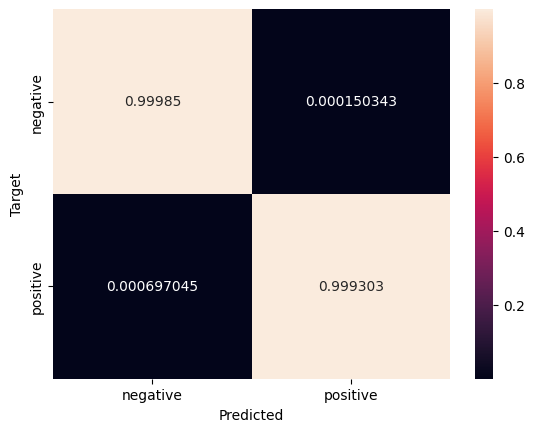

In [117]:
# to plot confusion matrix for Random Forest training set
def plot_cm(rf_train_cm):
    classes = ['negative','positive']
    df_rf_train_cm = pd.DataFrame(rf_train_cm, index=classes, columns=classes)
    ax = sns.heatmap(df_rf_train_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(rf_train_cm)
plt.show()

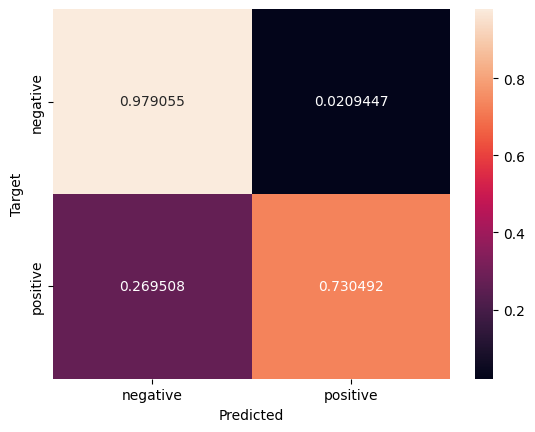

In [121]:
# to plot the confusion matrix for Random Forest Testing set
# accuracy rate for True Negative cases (Diabetes) = 97.9%
# accuracy rate for True positive cases = 73.04%
rf_test_cm = confusion_matrix(y_test, rf_pred, normalize='true')
plot_cm(rf_test_cm)
plt.show()

In [123]:
print("RF train AUC:", roc_auc_score(y_train_res, rf_train_pred))
print("RF test AUC:", roc_auc_score(y_test, rf_pred))

RF train AUC: 0.9995763059344502
RF test AUC: 0.854773751979247


In [125]:
# AUC score for Random Forest classifier = 85.47%

In [129]:
print("RF train F1:", f1_score(y_train_res, rf_train_pred))
print("RF test F1:", f1_score(y_test, rf_pred)) # F1 score for Random Forest classifier = 74.5%

RF train F1: 0.9995761900855823
RF test F1: 0.7450260177532905


In [131]:
print(classification_report(y_test,rf_pred)) # Random Forest = 96% accuracy

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18334
           1       0.76      0.73      0.75      1666

    accuracy                           0.96     20000
   macro avg       0.87      0.85      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [133]:
# to build an AdaBoost classifier
ada = AdaBoostClassifier()

In [135]:
ada.fit(X_train_res, y_train_res)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [137]:
# to do prediction on the Adaboost train set
ada_train_pred = ada.predict(X_train_res)

In [139]:
# to print first 10 prediction of Adaboost training set
ada_train_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [141]:
ada_pred = ada.predict(scaled_X_test)

In [145]:
ada_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [149]:
# Confusion matrix for AdaBoost train set
ada_train_cm = confusion_matrix(y_train_res, rf_train_pred, normalize='true')
ada_train_cm

array([[9.99849657e-01, 1.50343056e-04],
       [6.97045076e-04, 9.99302955e-01]])

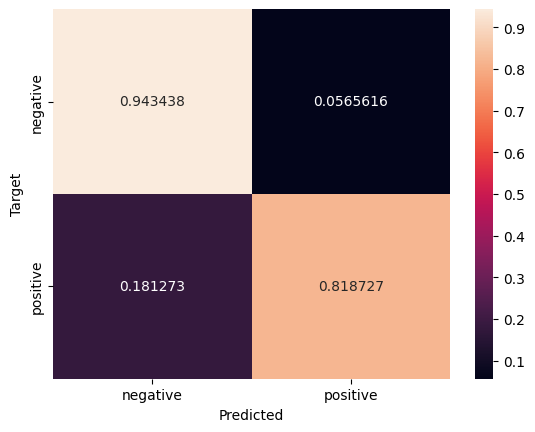

In [151]:
# to plot confusion matrix for AdaBoost testing set
# accuracy rate for Negative cases = 94.34%
# accuracy rate for Positive cases (diabetics) = 81.87%
ada_test_cm = confusion_matrix(y_test, ada_pred, normalize='true')
plot_cm(ada_test_cm)
plt.show()

In [162]:
# to compute the AUC score and F1 for AdaBoost model
print("Ada train AUC:", roc_auc_score(y_train_res, ada_train_pred))
print("Ada test AUC:", roc_auc_score(y_test, ada_pred))

Ada train AUC: 0.9444824098625043
Ada test AUC: 0.8810829557087371


In [158]:
# AUC score for AdaBoost classifier = 88.1%

In [164]:
print("Ada train F1:", f1_score(y_train_res, ada_train_pred))
print("Ada test F1:", f1_score(y_test, ada_pred)) # F1 score for AdaBoost = 67.07%

Ada train F1: 0.9444998565358182
Ada test F1: 0.6707646914187362


In [166]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18334
           1       0.57      0.82      0.67      1666

    accuracy                           0.93     20000
   macro avg       0.78      0.88      0.82     20000
weighted avg       0.95      0.93      0.94     20000



In [172]:
gb = GradientBoostingClassifier()

In [174]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [176]:
gb_pred = gb.predict(scaled_X_test)

In [178]:
gb_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [182]:
# to predict on the Gradient Boost training set
gb_train_pred = gb.predict(X_train_res)

In [184]:
gb_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [187]:
# to compute the AUC and F1 score for Gradient Boost model
print("GB train AUC:", roc_auc_score(y_train_res, gb_train_pred))
print("GB test AUC:", roc_auc_score(y_test, gb_pred))

GB train AUC: 0.9613891698329824
GB test AUC: 0.8722639704949288


In [189]:
# AUC score for Gradient Boost classifier = 87.23%

In [191]:
print("GB train F1:", f1_score(y_train_res, gb_train_pred))
print("GB test F1:", f1_score(y_test, gb_pred))  # F1 score for Gradient Boost classifier = 74.46%

GB train F1: 0.9610043619899509
GB test F1: 0.7446438911407064


In [193]:
print(classification_report(y_test,gb_pred)) # GB 96% accuracy

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18334
           1       0.72      0.77      0.74      1666

    accuracy                           0.96     20000
   macro avg       0.85      0.87      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [195]:
xg = XGBClassifier()

In [197]:
xg.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [201]:
# to predict on X test data, XGBoost classifier
xg_pred = xg.predict(scaled_X_test)

In [206]:
xg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [208]:
# to return predictions on the XGBoost train set
xg_train_pred = xg.predict(X_train_res)

In [210]:
xg_train_pred

array([0, 0, 1, ..., 1, 1, 1])

In [214]:
# to print XGBoost confusion matrix on train set
xg_train_cm = confusion_matrix(y_train_res, xg_train_pred, normalize='true')
xg_train_cm

array([[0.99728016, 0.00271984],
       [0.03237843, 0.96762157]])

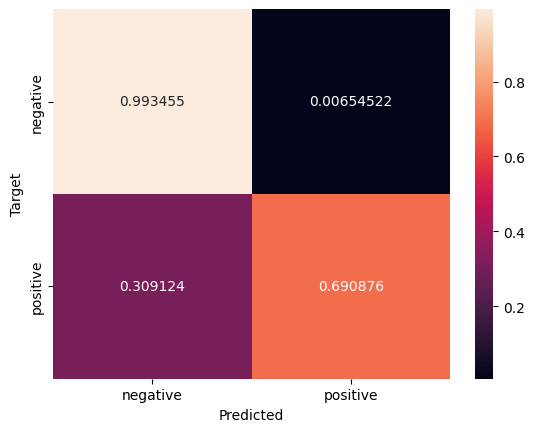

In [217]:
# to print XGBoost confusion matrix on testing set
# accuracy rate True negative cases = 99.34%
# accuracy rate True positive cases (Diabetics) = 69.08%
xg_test_cm = confusion_matrix(y_test, xg_pred, normalize='true')
plot_cm(xg_test_cm)
plt.show()

In [220]:
# to compute the AUC and F1 score for XGBoost classifier model
print("XGB train AUC:", roc_auc_score(y_train_res, xg_train_pred))
print("XGB test AUC:", roc_auc_score(y_test, xg_pred))

XGB train AUC: 0.9824508651559467
XGB test AUC: 0.8421655670013178


In [ ]:
# AUC score for XGBoost classifier = 84.21%

In [225]:
print("XGB train F1:", f1_score(y_train_res, xg_train_pred))
print("XGB test F1:", f1_score(y_test, xg_pred))   # F1 score for XGBoost classifier = 78.37%

XGB train F1: 0.9821867066217173
XGB test F1: 0.783792986040177


In [227]:
print(classification_report(y_test,xg_pred)) # XGBoost 97% accuracy

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18334
           1       0.91      0.69      0.78      1666

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [233]:
dt = DecisionTreeClassifier()

In [235]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [237]:
dt_pred = dt.predict(scaled_X_test)

In [239]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [241]:
# to do prediction on X train set: Decision Tree
dt_train_pred = dt.predict(X_train_res)

In [244]:
dt_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [246]:
# to compute the confusion matrix on Decision tree train set
dt_train_cm = confusion_matrix(y_train_res, dt_train_pred, normalize='true')
dt_train_cm

array([[1.00000000e+00, 0.00000000e+00],
       [8.47388131e-04, 9.99152612e-01]])

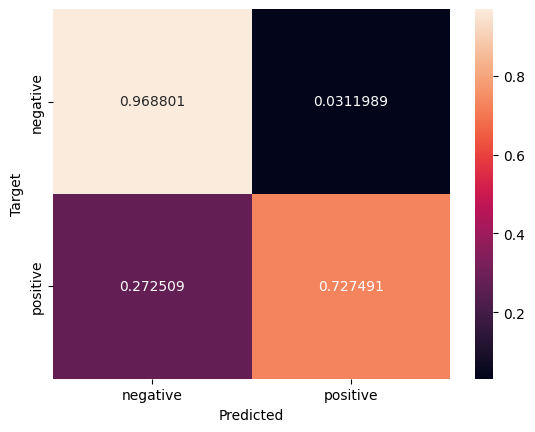

In [256]:
# to plot the confusion tree matrix for Decision Tree testing set
# accuracy rate Negative cases = 96.88%
# accuracy rate Positive cases (Diabetics) = 72.74%
dt_test_cm = confusion_matrix(y_test, dt_pred, normalize='true')
plot_cm(dt_test_cm)
plt.show()

In [261]:
# to print the AUC score and F1 score for Decision Tree prediction model
print("DT train AUC:", roc_auc_score(y_train_res, dt_train_pred))
print("DT test AUC:", roc_auc_score(y_test, dt_pred))

DT train AUC: 0.9995763059344505
DT test AUC: 0.8481460654513796


In [ ]:
# AUC score for Decision tree prediction model = 84.81%

In [263]:
print("DT train F1:", f1_score(y_train_res, dt_train_pred))
print("DT test F1:", f1_score(y_test, dt_pred))   # F1 score Decision tree prediction model = 70.26%

DT train F1: 0.9995761263416969
DT test F1: 0.7026086956521739


In [265]:
print(classification_report(y_test,dt_pred)) # Decision Tree 95% accuracy

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18334
           1       0.68      0.73      0.70      1666

    accuracy                           0.95     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [86]:
# AUC for AdaBoost prediction model = 89.25%
# Among all the models, Adaboost has the highest AUC score at 89.25%

In [267]:
ada.feature_importances_

array([0.12, 0.02, 0.02, 0.06, 0.58, 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

In [269]:
pd.DataFrame(data = ada.feature_importances_, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
HbA1c_level,0.58
blood_glucose_level,0.20
age,0.12
bmi,0.06
hypertension,0.02
heart_disease,0.02
gender_Male,0.00
gender_Other,0.00
smoking_history_current,0.00
smoking_history_ever,0.00


In [271]:
# to read into a new dataframe
ada_imp = pd.DataFrame(data = ada.feature_importances_, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_17136\3217889844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ada_imp, y=ada_imp.index, x='Importance', palette='magma')


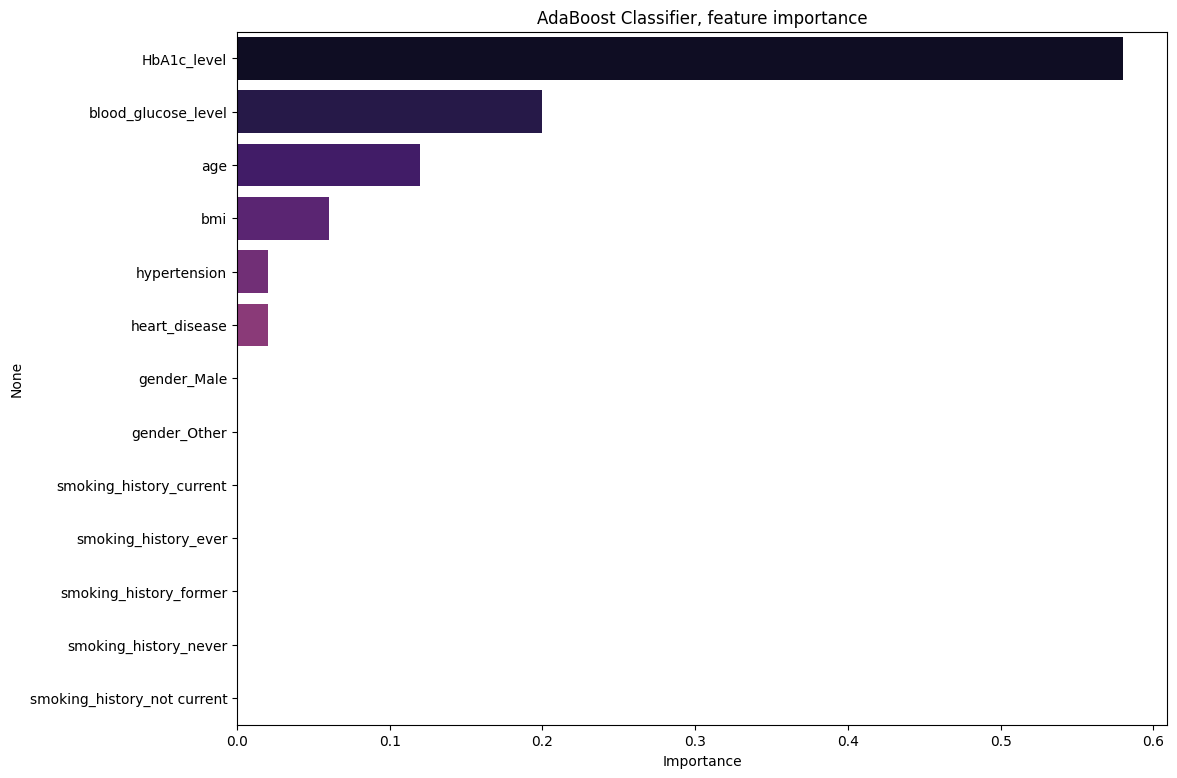

In [273]:
# Predictors for diabetic patients: HbA1c_level, blood_glucose_level, age, bmi, hypertension
plt.figure(figsize=(12,9), dpi=100)
sns.barplot(data=ada_imp, y=ada_imp.index, x='Importance', palette='magma')
plt.title('AdaBoost Classifier, feature importance')
plt.show()